# Determination of the factors influencing the success of computer games

## Project Description
The customer is the 'Strimchik' online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources.

## Purpose of the study
It is necessary to identify patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

## Steps of the research

1) Data review;

2) Data preprocessing (filling gaps, eliminating duplicates and anomalies);

3) Data analysis;

4) Hypothesis testing;

5) Conclusion.

# 1. Data overview

We import all the necessary libraries for working with data.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

Let's look at the original data table.

In [77]:
try:
    df = pd.read_csv('D:\Yandex_Data_Analysis\Project_5\games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [78]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [79]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [81]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

As you can see, there are quite a lot of gaps in the data, and in some places there is not quite the correct data type. Let's bring the data into a workable form.

# 2. Data preprocessing

Let's start by converting all column names to lowercase.

In [82]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Such a large number of gaps in the rating column is most likely due to the fact that some games were released by foreign companies. The rating is made by an American agency, they may not rate games released outside of America.

As you can see, the number of gaps in this column matches the user_score column. Apparently the reason is the same - only user ratings from America are taken into account.

It can be assumed that the omissions in the critic_score column are also due to the fact that the experts are mostly American and/or rated games released in America.

Since there are only 269 gaps in the column with game releases, you can simply delete them. This will not distort our data much, since there are only about 2% of such rows. We also convert the data type of this column to integers.

In [83]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].isna().sum()

0

In [84]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


For further convenience, we reduce the estimates to a general form. Let's multiply the user ratings by 10. But first, let's convert the values to fractional numbers, since there are many empty nan values in this column, which will interfere with the conversion.

In [85]:
df['user_score'] = df['user_score'].fillna(0)
df['user_score'].isna().sum()

0

Make sure there are no string values in this column.

In [86]:
df['user_score'].value_counts()

0      6607
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.5       2
0.9       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

As you can see, there are quite a few values with the string 'tbd', which means to be determined. In other words, the game has not yet been rated by the players. Therefore, we will replace these values with 0, since such a replacement will not distort our data. After that, it will be possible to convert the data to fractional numbers.

In [87]:
df.loc[df['user_score']=='tbd','user_score'] = 0
df['user_score'] = df['user_score'].astype(float)

Now you can bring user ratings to the same form as expert ratings by multiplying by 10.

In [88]:
df['user_score'] = df['user_score']*10
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E


You may notice that in the 'name' column there are 2 rows where the name of the game is not indicated. Since there are very few such rows, we simply remove them from the dataset.

In [89]:
df = df.dropna(subset=['name'])
df['name'].isna().sum()

0

We have done the operations described above in order to cast data types to a common type in the columns with ratings and rating. However, leaving 0 instead of empty values is not entirely correct and they can distort our graphs in the future. Let's replace 0 back with empty NaN values in the 'user_score' column. For correct plotting and further analysis, we will replace the gaps in the 'rating' column with tbd.

In [90]:
df['user_score'].replace(0, np.nan, inplace=True)
df['rating'] = df['rating'].fillna('tbd')
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E


Let's calculate the total sales in all regions and write them in a separate column.

In [91]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38


# 3. Data analysis

## 3.1. Number of released games by year

Let's create a pivot table where we will collect information about released games depending on the year. Then we will build a graph.

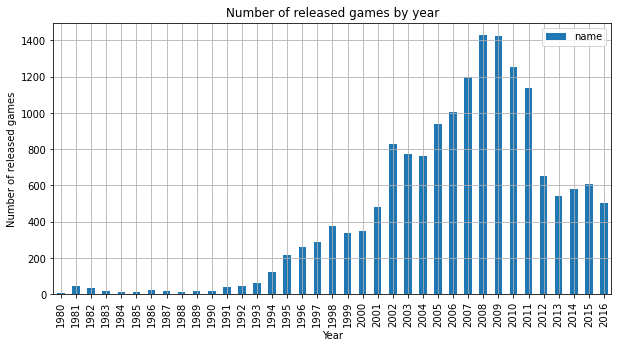

In [92]:
released_games = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
released_games_plot = released_games.plot(kind='bar',
linewidth=2,
grid=True,
figsize=(10,5),
title='Number of released games by year')
released_games_plot.set_xlabel('Year')
released_games_plot.set_ylabel('Number of released games')
plt.show()

As you can see, games have been actively released since 1995. The peak of growth occurs from 2007 to 2009. Accordingly, the most interesting period for further analysis is from 1995 to 2016.

## 3.2.  Dependence of sales on platforms by years

Let's create a pivot table, where we will collect information and the number of released games for each year. Next, let's build a graph.

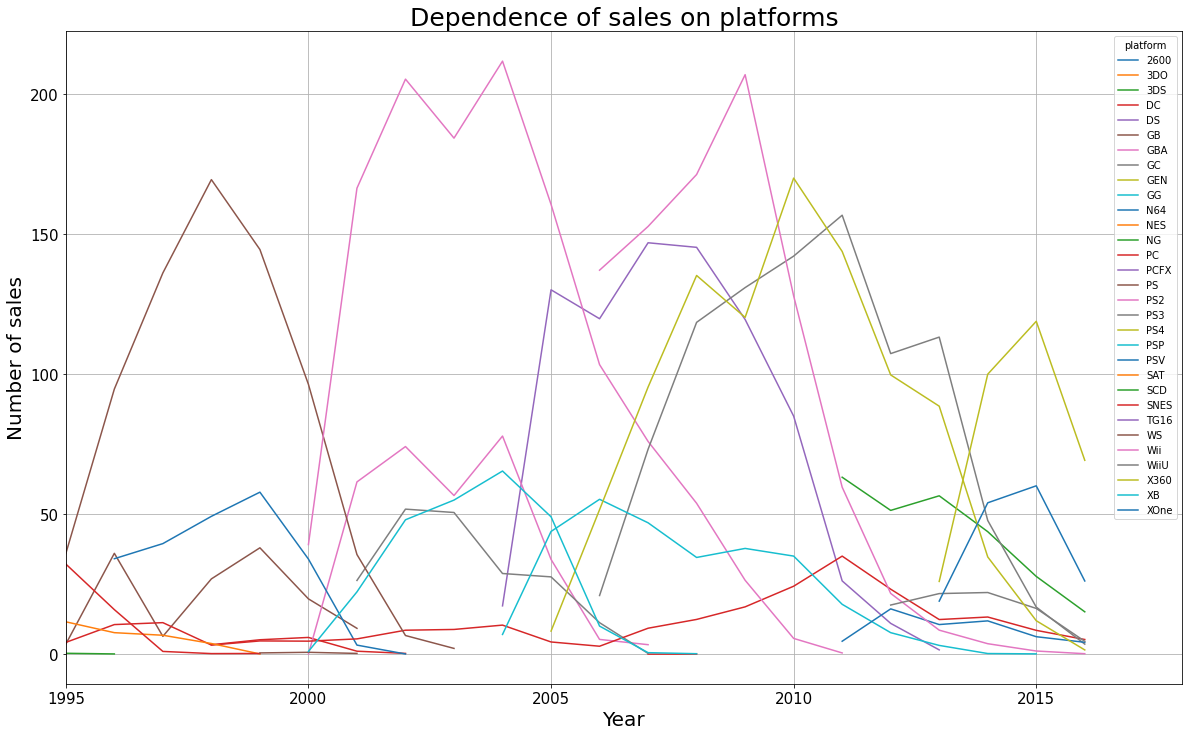

In [93]:
df_pivot = df.pivot_table(index='year_of_release', columns ='platform' ,values='total_sales', aggfunc='sum')
df_pivot_plot = df_pivot.plot(kind='line',
figsize=(20,12),
grid=True, fontsize=15)
plt.xlim(1995, 2018)
plt.title('Dependence of sales on platforms', fontsize = 25)
df_pivot_plot.set_xlabel('Year', fontsize=20)
df_pivot_plot.set_ylabel('Number of sales', fontsize=20)
plt.show()

On the graph, you can see how the number of sales of different platforms changed in different years. So PS was popular from 1995 to 2000; GBA - at the beginning of the 2000s; PS2 - from 2005 to 2010; PS3, PS4 and X360 after 2010. The rest of the platforms lost audience interest by the mid-2000s. Sales of PC games have roughly always remained at the same level within 25.

Let's see the most popular platforms by the number of sales of all time.

In [94]:
platform_revenue = df.pivot_table(index='platform', values='total_sales',aggfunc='sum').sort_values(by='total_sales',
                                                                                                    ascending=False)
best_platforms = platform_revenue.iloc[:5]
best_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


PS2 has become the most popular platform of all time.
For further analysis, we will take the range from 2012 to 2016 for the current period.

In [95]:
act_df = df_pivot.query('year_of_release >= 2012')

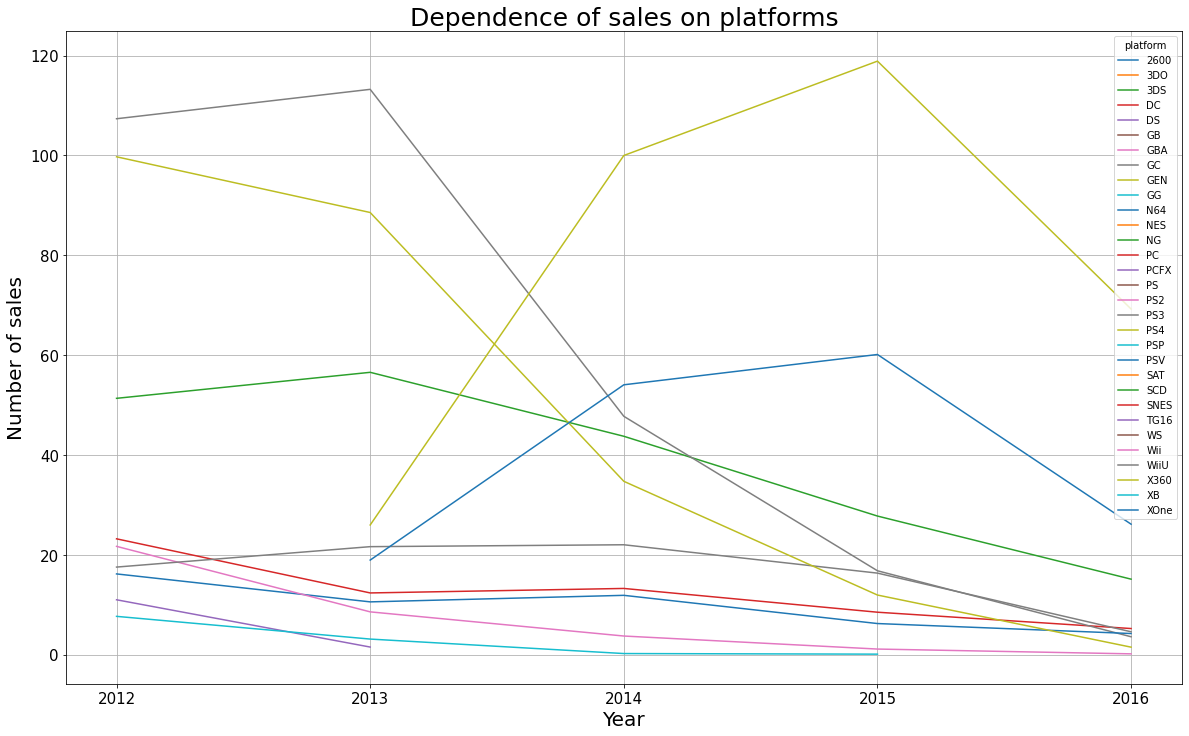

In [96]:
x_ticks = [2012, 2013, 2014, 2015, 2016]
x_labels = ['2012', '2013', '2014', '2015', '2016']
act_df_plot = act_df.plot(kind='line',
figsize=(20,12),
grid=True,
fontsize=15)
plt.title('Dependence of sales on platforms', fontsize = 25)
act_df_plot.set_xlabel('Year', fontsize=20)
act_df_plot.set_ylabel('Number of sales', fontsize=20)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.show()

The general trend is that the popularity of all platforms is falling towards the end of 2016. However, XOne and PS4 are potentially successful. The popularity of the WiiU and the X360 has dropped dramatically since 2013.

**Now let's see global game sales by top platforms.**

First, let's filter the original dataframe by the most popular platforms after 2012.

In [97]:
modern_df = df.query('year_of_release >=2012')

In [98]:
top_platforms_filtered = modern_df.groupby('platform').sum().sort_values(by='total_sales',ascending=False)
top_platforms_filtered = top_platforms_filtered.reset_index()
top_platforms_filtered = top_platforms_filtered.loc[:6, ['platform', 'total_sales']]
top_platforms_filtered

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65


In [99]:
top_platforms_names = top_platforms_filtered['platform'].unique()
top_platforms_names

array(['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC'], dtype=object)

As you can see, PS4 has become the most popular platform for the current period (after 2012).

Now let's create range charts for each platform. To begin with, we will create a new dataset, where we will collect all the relevant information about the most popular platforms after 2012.

In [100]:
top_platforms = modern_df.query('platform == ["PS4", "PS3", "X360", "3DS", "XOne", "WiiU", "PC"]')
top_platforms = top_platforms[['platform', 'total_sales']]
top_platforms.head(3)

,platform,total_sales
16,PS3,21.05
23,X360,16.27
31,PS4,14.63


Let's look at the numbers.

In [101]:
top_platforms.groupby('platform').describe()

total_sales                                                     
               count      mean       std   min   25%   50%     75%    max
platform                                                                 
3DS            396.0  0.491439  1.387161  0.01  0.04  0.11  0.3125  14.60
PC             250.0  0.250600  0.494640  0.01  0.03  0.08  0.2400   5.14
PS3            493.0  0.585781  1.462855  0.01  0.05  0.20  0.6100  21.05
PS4            392.0  0.801378  1.609456  0.01  0.06  0.20  0.7300  14.63
WiiU           147.0  0.559116  1.058836  0.01  0.08  0.22  0.5250   7.09
X360           292.0  0.810068  1.712069  0.01  0.10  0.31  0.8700  16.27
XOne           247.0  0.645020  1.036139  0.01  0.06  0.22  0.6850   7.39

Now let's build a range chart for all platforms.

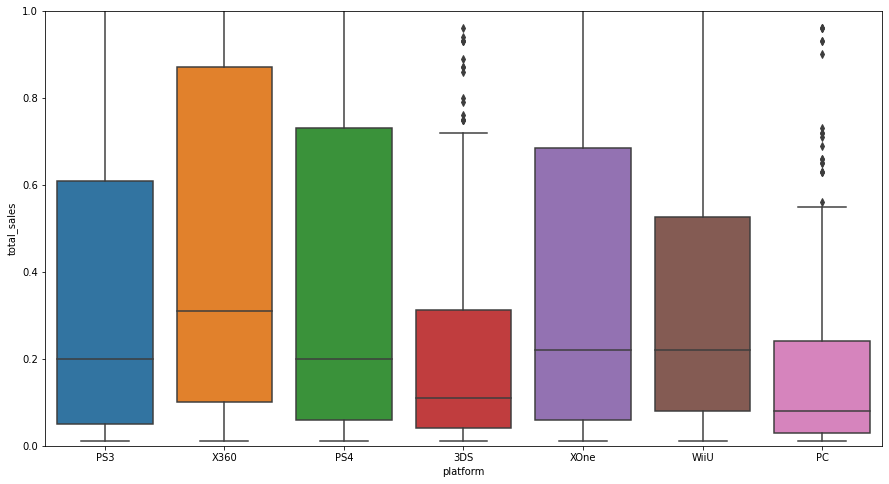

In [102]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=top_platforms["platform"], y=top_platforms["total_sales"])
plt.ylim(0, 1)
plt.show();

The following features can be noted on the range diagram:
* platforms PS3, PS4, XOne and WiiU have almost the same median sales (0.2);
* each platform has outliers;
* the biggest sales of platforms X360, PS4, XOne according to the normal scope;
* Most sales from the PS3 platform - 493;
* leader in terms of normal range and median sales - X360;
* PS4 has the most emissions. This suggests that after 2013 a boom began on this platform;
* the smallest sales and the least emissions from the PS platform;

**Let's see how sales within one popular platform are influenced by user and critic reviews**

Let's take PS4 as a popular platform.

In [103]:
ps4 = modern_df.query('platform == "PS4"')

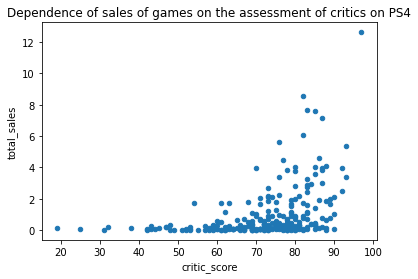

In [104]:
ps4.plot(x='critic_score', y='total_sales',kind='scatter',
         title = 'Dependence of sales of games on the assessment of critics on PS4',figsize=(6, 4));

In [105]:
print('Correlation between critical reviews and sales:', ps4['critic_score'].corr(ps4['total_sales']))

Correlation between critical reviews and sales: 0.4065679020617816


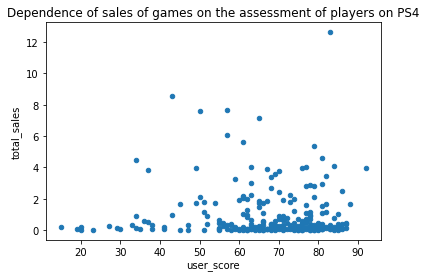

In [106]:
ps4.plot(x='user_score', y='total_sales',kind='scatter',
         title = 'Dependence of sales of games on the assessment of players on PS4',figsize=(6, 4));

In [107]:
print('Correlation between user reviews and sales:',ps4['user_score'].corr(ps4['total_sales']))

Correlation between user reviews and sales: -0.03195711020455644


As can be seen from the graphs and correlations, there is a certain dependence. The most popular games are those with 'above average' ratings. Critics' ratings show a direct, medium-weak correlation with sales "numbers". There is almost no correlation between user ratings and sales. It is noticeable that games that experts give high ratings sell better. Apparently this is a psychological factor that helps buyers make a choice in the direction of a particular game when buying.

**Ratio of withdrawals to sales of games on other platforms**

Let's look at the relationship between ratings and sales for all games since 2012.

In [108]:
print(modern_df[['critic_score', 'user_score', 'total_sales']].corr()) 


              critic_score  user_score  total_sales
critic_score      1.000000    0.517727     0.308197
user_score        0.517727    1.000000     0.004429
total_sales       0.308197    0.004429     1.000000


According to the preliminary assessment, it is noticeable that the feedback from the players is highly dependent on the ratings of the critics. Sales volumes do not depend much on reviews.

Let's see how popular games are on other platforms.

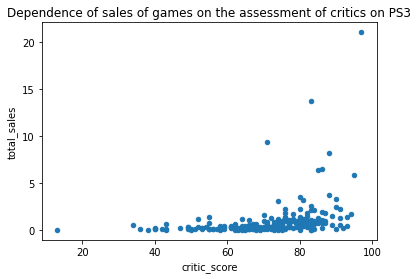

In [109]:
ps3 = modern_df.query('platform == "PS3"')
ps3.plot(x='critic_score', y='total_sales',kind='scatter',
         title = 'Dependence of sales of games on the assessment of critics on PS3', figsize=(6, 4));

It is noticeable that games with high ratings are more popular on PS3.

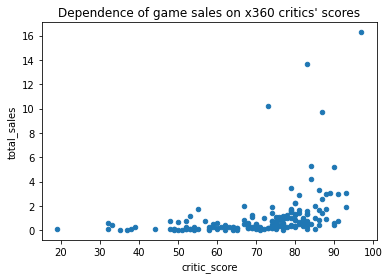

In [110]:
x360 = modern_df.query('platform == "X360"')
x360.plot(x='critic_score', y='total_sales',kind='scatter', title = "Dependence of game sales on x360 critics' scores",
          figsize=(6, 4));

The situation is similar - games with high ratings are more popular on X360 too.

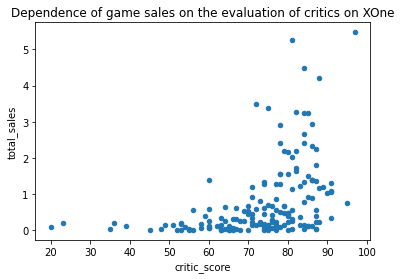

In [111]:
x_one = modern_df.query('platform == "XOne"')
x_one.plot(x='critic_score', y='total_sales',kind='scatter',
           title = 'Dependence of game sales on the evaluation of critics on XOne', figsize=(6, 4));

The situation is similar with XOne.

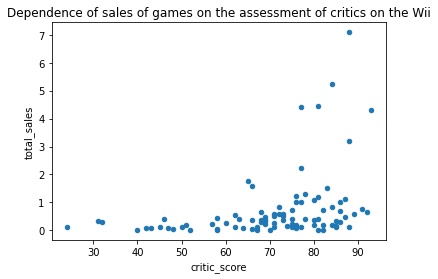

In [112]:
wii = modern_df.query('platform == "WiiU"')
wii.plot(x='critic_score', y='total_sales',kind='scatter',
         title = 'Dependence of sales of games on the assessment of critics on the Wii', figsize=(6, 4));

The same is true for the Wii.

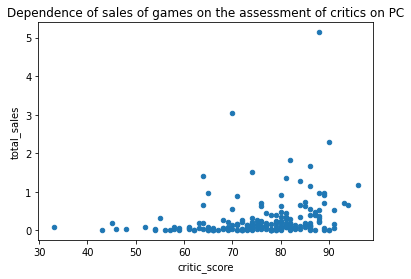

In [113]:
ds = modern_df.query('platform == "PC"')
ds.plot(x='critic_score', y='total_sales',kind='scatter',
        title = 'Dependence of sales of games on the assessment of critics on PC', figsize=(6, 4));

But on the PC, the popularity of games does not depend much on critics' ratings. Apparently this is due to the fact that users buy everything, for example, there are fewer games and PC owners have no choice. And in general, games on this console after 2012 became not very popular.

**Popular genres**

Let's see what are the genres of games released after 2012.

In [114]:
modern_df['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

Now let's look at the popularity of each genre. To do this, look at the median sales of each genre. This approach is due to the fact that too many sales of certain genres does not mean its popularity. High sales may hide games with low ratings. Median values will help cut out all the outliers and show a real picture of the popularity of genres.

In [115]:
modern_genres = modern_df.groupby('genre')['total_sales'].mean()

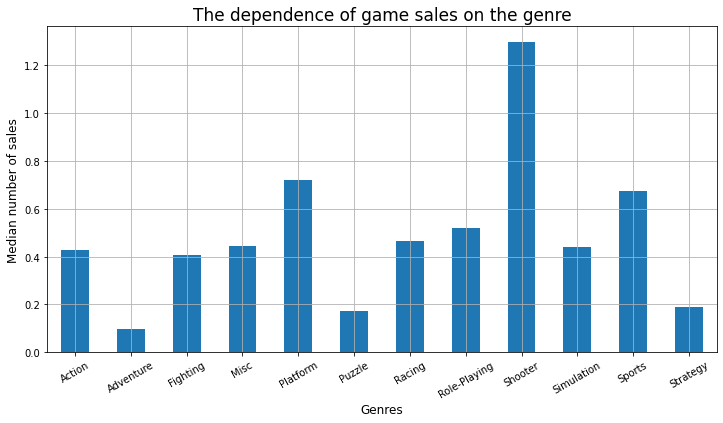

In [116]:
pop_genres_plot = modern_genres.plot(kind='bar',
figsize=(12,6),
grid=True, fontsize=10)
plt.title('The dependence of game sales on the genre', fontsize = 17)
pop_genres_plot.set_xlabel('Genres', fontsize=12)
pop_genres_plot.set_ylabel('Median number of sales', fontsize=12)
pop_genres_plot.set_xticklabels(pop_genres_plot.get_xticklabels(),rotation = 30)
plt.show()

It is noticeable that the most popular genre is Shooter. It is this genre that has the highest average level of sales, although their total number is less than that of the Action genre.

**Top selling genres by platform.**

Let's create a pivot table to look at the total number of game sales by genre across all platforms

In [117]:
top_genres = modern_df.pivot_table(index='genre', columns='platform', values='total_sales', aggfunc='sum')
top_genres

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,45.49,1.82,13.14,115.75,96.10,3.76,16.33,10.75,19.07,81.60,37.31
Adventure,4.30,0.06,0.87,6.09,6.34,1.67,3.79,0.19,0.17,3.27,2.68
Fighting,8.46,NaN,0.12,11.00,8.65,0.36,2.21,NaN,6.27,4.97,2.45
Misc,9.45,0.48,0.73,8.88,8.19,0.41,4.32,17.86,12.46,14.83,7.43
Platform,19.11,0.69,0.14,4.26,7.69,NaN,2.26,2.25,21.53,2.14,0.93
Puzzle,2.66,0.10,0.03,0.04,0.02,NaN,0.06,0.66,1.32,NaN,NaN
Racing,0.28,NaN,1.23,11.56,12.14,NaN,2.21,0.01,7.87,8.41,9.79
Role-Playing,79.30,9.08,13.65,22.62,28.99,2.81,12.05,1.06,2.89,9.80,10.55
Shooter,0.13,NaN,14.27,60.39,88.56,NaN,2.34,NaN,6.01,72.70,60.33


Let's look at the total total sales and median sales of each genre per year.

In [118]:
total_median = top_genres.median(axis=1).sort_values(ascending = False)
total_median

genre
Shooter         37.300
Action          19.070
Role-Playing    10.550
Misc             8.190
Racing           7.870
Fighting         4.970
Sports           3.260
Adventure        2.680
Platform         2.255
Strategy         0.805
Simulation       0.690
Puzzle           0.080
dtype: float64

In [119]:
total_sum = top_genres.sum(axis=1).sort_values(ascending = False)
total_sum

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
dtype: float64

As you can see, the Action genre has the highest overall sales. However, as mentioned above, this is not an indicator of popularity. Shooter became the most popular genre, it has the highest average sales per year.

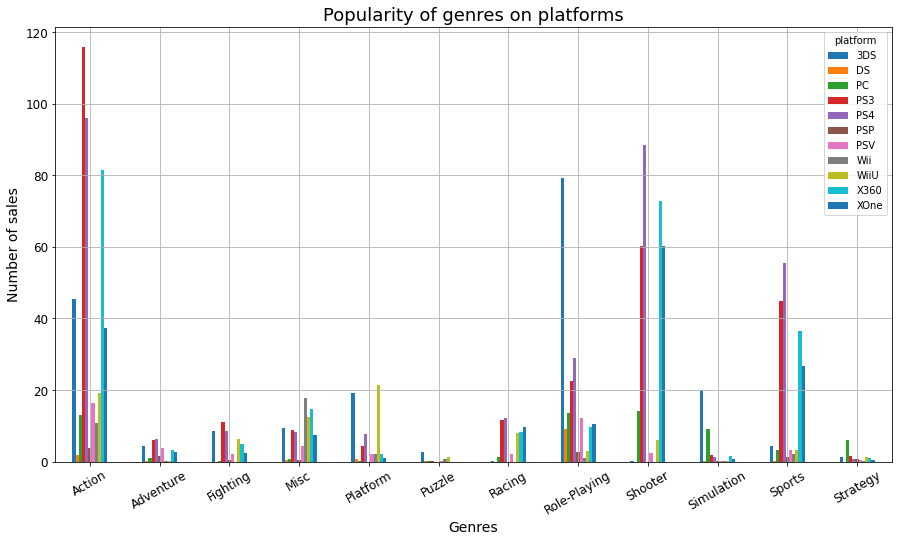

In [120]:
top_genres_plot = top_genres.plot(kind='bar',
figsize=(15,8),
grid=True, fontsize=12)
plt.title('Popularity of genres on platforms', fontsize = 18)
top_genres_plot.set_xlabel('Genres', fontsize=14)
top_genres_plot.set_ylabel('Number of sales', fontsize=14)
top_genres_plot.set_xticklabels(top_genres_plot.get_xticklabels(),rotation = 30)
plt.show()

Analyzing the graph, several features can be distinguished:
* the best selling genre on almost all platforms is action. Most of all it is played on PS3;
* the least popular genre is puzzle;
* least played on the DS platform. The most popular genre on it is Role-Playing;
* PS4 is played almost the most in all genres;
* The most popular Shooter genre is mainly played on PS4.

## 3.3. User portrait for each region

### 3.3.1. Most Popular Platforms

Let's determine which are the most popular platforms for users in North America (NA), Europe (EU), and Japan (JP). To do this, select the top-5 platforms.

In [121]:
top_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
Name: total_sales, dtype: float64

As you can see, the top 5 did not include the WiiU and PC platforms. Let's get rid of all the lines that contain information on these platforms.

In [122]:
top_five = modern_df
top_five = top_five.query('platform == ["PS4","PS3","X360","3DS","XOne"]')
top_five.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,tbd,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


In [123]:
top_five['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne'], dtype=object)

In [124]:
platforms_regions = top_five[['platform', 'na_sales', 'eu_sales', 'jp_sales']]
platforms_regions = platforms_regions.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'],
                                                 aggfunc='sum')
platforms_regions

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
X360,74.52,1.57,140.05
XOne,51.59,0.34,93.12


In [125]:
print('Total sales in Japan -', np.ceil(platforms_regions['jp_sales'].sum()).astype(int))
print('Total sales in North America -', np.ceil(platforms_regions['na_sales'].sum()).astype(int))
print('Total sales in Europe -', np.ceil(platforms_regions['eu_sales'].sum()).astype(int))

Total sales in Japan - 141
Total sales in North America - 501
Total sales in Europe - 417


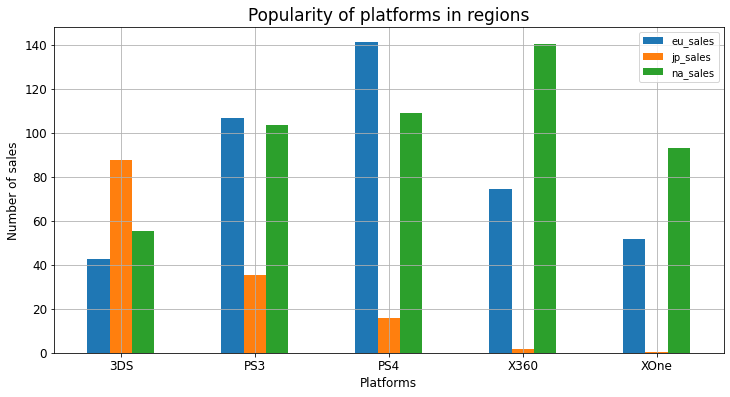

In [126]:
platforms_regions_plot = platforms_regions.plot(kind='bar',
figsize=(12,6),
grid=True, fontsize=12)
plt.title('Popularity of platforms in regions', fontsize = 17)
platforms_regions_plot.set_xlabel('Platforms', fontsize=12)
platforms_regions_plot.set_ylabel('Number of sales', fontsize=12)
platforms_regions_plot.set_xticklabels(platforms_regions_plot.get_xticklabels(),rotation = 0)
plt.show()

The graph shows the following features:
* The most popular platform in Europe - PS4;
* The most popular platform in North America - X360;
* The most popular platform in Japan is 3DS;
* PS3, PS4, and XOne platforms are roughly equally popular in North America;
* In Japan, the other consoles are the least played;

### 3.3.2. The most popular genres in the regions

Let's build a summary table of all game genres played in North America (NA), Europe (EU), and Japan (JP).

In [127]:
top_genres_regions = top_five[['genre', 'na_sales', 'eu_sales', 'jp_sales']]
top_genres_regions = top_genres_regions.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'],
                                                 aggfunc='sum')
top_genres_regions

,eu_sales,jp_sales,na_sales
genre,,,
Action,136.51,40.95,153.47
Adventure,7.84,4.28,8.19
Fighting,8.77,7.41,15.65
Misc,14.43,6.61,22.86
Platform,12.53,4.89,13.38
Puzzle,0.89,1.21,0.51
Racing,22.70,1.10,12.98
Role-Playing,38.04,49.49,51.81
Shooter,102.87,7.58,136.53


Let's select top-5 popular genres from this table and build a graph.

In [128]:
top_genres_regions = top_genres_regions.sort_values(by='eu_sales',ascending=False)[:5]
top_genres_regions

,eu_sales,jp_sales,na_sales
genre,,,
Action,136.51,40.95,153.47
Shooter,102.87,7.58,136.53
Sports,63.30,5.61,77.65
Role-Playing,38.04,49.49,51.81
Racing,22.70,1.10,12.98


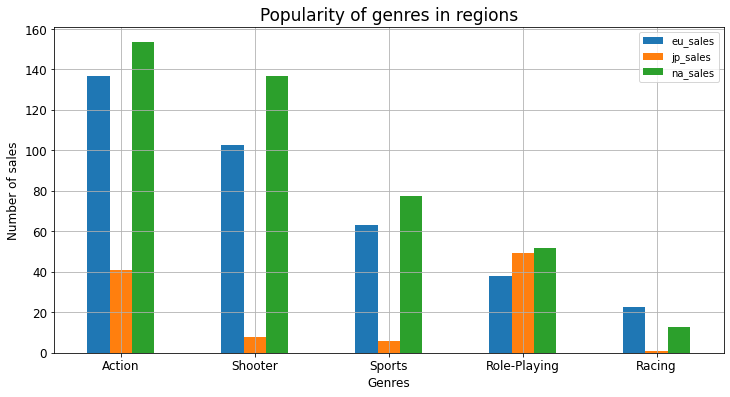

In [129]:
top_genres_regions_plot = top_genres_regions.plot(kind='bar',
figsize=(12,6),
grid=True, fontsize=12)
plt.title('Popularity of genres in regions', fontsize = 17)
top_genres_regions_plot.set_xlabel('Genres', fontsize=12)
top_genres_regions_plot.set_ylabel('Number of sales', fontsize=12)
top_genres_regions_plot.set_xticklabels(top_genres_regions_plot.get_xticklabels(),rotation = 0)
plt.show()

The graph shows the following features:
* The most popular genre in all regions - Action;
* The least popular genre in all regions - Racing;
* Users from North America play almost all genres the most;
* Role-Playing genre is the most popular in Japan;

### 3.3.3. Dependence of the ESRB rating on sales by region

Let's see how the ESRB rating will affect sales by region. First, let's build a pivot table.

In [130]:
rating_regions = top_five[['rating', 'na_sales', 'eu_sales', 'jp_sales']]
rating_regions = rating_regions.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],
                                                 aggfunc='sum')
rating_regions

,eu_sales,jp_sales,na_sales
rating,,,
E,91.71,19.98,93.39
E10+,34.22,4.82,47.99
M,172.57,18.96,214.11
T,41.78,19.51,56.07
tbd,76.42,77.68,89.04


In [131]:
total_sum_rating = rating_regions.sum(axis=1)
total_sum_rating

rating
E       205.08
E10+     87.03
M       405.64
T       117.36
tbd     243.14
dtype: float64

Now let's build a graph for clarity.

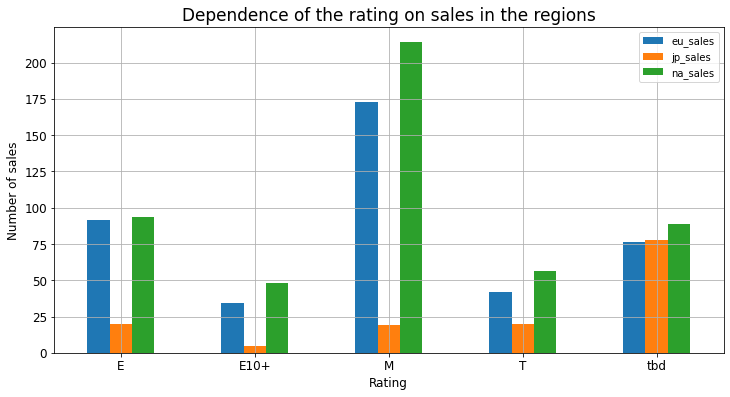

In [132]:
rating_regions_plot = rating_regions.plot(kind='bar',
figsize=(12,6),
grid=True, fontsize=12)
plt.title('Dependence of the rating on sales in the regions', fontsize = 17)
rating_regions_plot.set_xlabel('Rating', fontsize=12)
rating_regions_plot.set_ylabel('Number of sales', fontsize=12)
rating_regions_plot.set_xticklabels(rating_regions_plot.get_xticklabels(),rotation = 0)
plt.show()

The graph shows the following patterns:
* The least influence on sales in all regions is the rating M - for teenagers from 17 years old;
* Rating E affects sales a little more - for everyone. With it, sales in all regions are 2 times less;
* The rest of the ratings of games have approximately the same effect on the sales of games in all regions;
* Least of all any ratings affect sales in North America;
* It is noticeable that the majority (about 75) are unrated games in all regions;
* The largest game sales in Japan are non-ESRB-rated games. Since this rating is American, it apparently does NOT take into account games released in Japan. It is likely that the Japanese are more willing to play their games than foreign ones.

# 4. Hypothesis testing

## 4.1. Hypothesis №1. The average user ratings of the Xbox One and PC platforms are the same

Since there are still empty NaN values in the 'user_score' column, we will delete these rows otherwise they will not allow us to test the hypotheses.

In [133]:
hypo1 = modern_df[['platform','user_score']]
hypo1 = hypo1.dropna(subset=['user_score'])
hypo1.isna().sum()

platform      0
user_score    0
dtype: int64

First, let's filter the current table by rating and platforms. Then we calculate the average user rating for Xbox One and PC.

In [134]:
hypo1_xone = hypo1.query('platform == "XOne"')['user_score']
print('Average Xbox One User Rating -', hypo1_xone.mean())

Average Xbox One User Rating - 65.21428571428571


In [135]:
hypo1_pc = hypo1.query('platform == "PC"')['user_score']
print('Average PC User Rating -',hypo1_pc.mean())

Average PC User Rating - 64.2864077669903


We formulate the null and alternative hypotheses:

* ***Null hypothesis - the average user rating of the Xbox and PC platforms are equal.***
* ***Alternative hypothesis - the average user rating of the Xbox platform is higher than that of the PC.***

**Statistical significance alpha=0.05**

First, let's check the size of each of the considered populations.

In [136]:
hypo1.query('platform == "XOne"').shape[0]

182

In [137]:
hypo1.query('platform == "PC"').shape[0]

206

Since these aggregates are different in size, we calculate the dispersions for each of them separately.

In [138]:
alpha = .05 # critical level of statistical significance, if p-value is less than it, we reject the hypothesis

results1 = st.ttest_ind(
    hypo1_xone, 
    hypo1_pc,
    equal_var=False)

print('p-value:', results1.pvalue)

if results1.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 0.5489537965135056
Failed to reject the null hypothesis


As you can see, the average user ratings of the Xbox and PC platforms are equal.

The alternative hypothesis no longer needs to be tested.

### Hypothesis №1 confirmed!

## 4.2. Hypothesis №2. The average user ratings for the Action and Sports genres are different.

Since there are still empty NaN values in the 'user_score' column, we will delete these rows otherwise they will not allow us to test the hypotheses.

In [139]:
hypo2 = modern_df[['genre','user_score']]
hypo2 = hypo2.dropna()
hypo2.isna().sum()

genre         0
user_score    0
dtype: int64

Now let's calculate the average user rating for Action and Sports genres.

In [140]:
hypo2 = modern_df[['genre','user_score']]
hypo2_action = hypo2.query('genre == "Action"')['user_score'].dropna()
print('Average user rating for Action genre -', hypo2_action.mean())

Average user rating for Action genre - 68.25047801147228


In [141]:
hypo2_sports = hypo2.query('genre == "Sports"')['user_score'].dropna()
print('Average user rating for Action genre -', hypo2_sports.mean())

Average user rating for Action genre - 54.55897435897436


We formulate the null and alternative hypotheses:

* ***Null hypothesis - the average user ratings of the Action and Sports genres are equal.***
* ***Alternative hypothesis - the average user rating of the Sports genre is lower than that of Action.***

**Statistical significance alpha=0.05**

First, let's check the size of each of the considered populations.

In [142]:
hypo2.query('genre == "Action"').shape[0]

1031

In [143]:
hypo2.query('genre == "Sports"').shape[0]

268

Since these aggregates are different in size, we calculate the dispersions for each of them separately.

In [144]:
alpha = .05 # critical level of statistical significance, if p-value is less than it, we reject the hypothesis

results2 = st.ttest_ind(
    hypo2_action, 
    hypo2_sports,
    equal_var=False)

print('p-value:', results2.pvalue)

if results2.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

p-value: 4.243077765726105e-20
Rejecting the null hypothesis


As you can see, the average values were not equal. P-value is negligible.

Let's test the alternative hypothesis that the average user rating of the Sports genre is lower than that of Action.

In [145]:
alpha = .05

results4 = st.ttest_1samp(
    hypo2_sports,
    hypo2_sports.mean())

# one-sided test: p-value will be half as large
print('p-value:', results4.pvalue / 2)

# one-sided test to the left:
# reject the hypothesis only when the sample mean is significantly less than the expected value

if (results4.pvalue /2 < alpha) and (hypo2_sports.mean() < hypo2_action.mean()):
    print("We reject the alternative hypothesis")
else:
    print("We do not reject the alternative hypothesis") 

p-value: 0.5
We do not reject the alternative hypothesis


As expected, the average user rating for the Sports genre is lower than for Action. Hence the ratings are different.

### Hypothesis №2 confirmed!

# 5. Conclusion

In the course of a study on determining the factors that affect the success of computer games, the following features were clarified:
* the popularity of platforms has changed throughout the entire period under consideration - from 1995 to 2016;
* games have been actively released since 1995. The peak of growth occurs from 2007 to 2009. There has been a clear decline in game releases since 2010;
* Sales of games on the PC almost always remained at the same level within 25;
* PS2 became the most popular platform of all time, although sales of games for it decreased significantly after 2007;
* the most interesting period for the analysis of promising platforms begins in 2012, since new platforms came out there that are still relevant today;
* the most promising platform for the current period was the PS4 platform with the largest number of game sales per year - 314;
* One of the factors influencing the success of computer games is the release of a new platform. So in 2013 the PS4 platform boomed as it just came out;
* The marketability of the game is psychologically affected by expert assessments. User rating also affects the success of the game, but to a slightly lesser extent;
* the most popular genre is Shooter, which leads in the highest average sales per year - 37 games;
* the best selling genre on almost all platforms is action. Most of all it is played on PS3;
* The most popular platform in Europe - PS4;
* The most popular platform in North America - X360;
* The most popular platform in Japan is 3DS;
* in Japan, the least played in any consoles and games - 141 game sales per year;
* total number of sales in Europe - 417;
* most played by users from North America - 501 sales per year;
* the least influence on sales in all regions is the rating M - for teenagers from 17 years old (more than 200 sales per year);
* other ratings of games have approximately the same effect on the sales of games in all regions - up to 75 sales per year;
* average user ratings for Xbox and PC platforms are equal;
* The average user rating for the Sports genre is lower than for Action.
* In Japan, the top-selling games are those that are not rated by the ESRB. Apparently this is due to the fact that the Japanese prefer to play their games. Another possible reason is that the American rating does not take into account Japanese games.

**The main factors that will affect the success of the game in 2017:**
* A shooter or action game released on the PS4 platform in Europe and on the Xbox 360 platform in North America with an M rating;
* It doesn't make much sense to release games for Japan, since they bring the least income there.